<a href="https://colab.research.google.com/github/B08092107/AI/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

RuntimeError: ignored

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21916 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27489 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33258 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_a

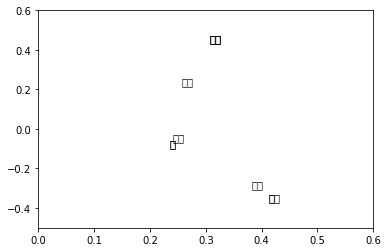

In [3]:
# Defined in Section 2.1.2

import numpy as np

M = np.array([[0, 2, 1, 1, 1, 1, 1, 2, 1, 3],
              [2, 0, 1, 1, 1, 0, 0, 1, 1, 2],
              [1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
              [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
              [2, 1, 0, 0, 0, 1, 1, 0, 1, 2],
              [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
              [3, 2, 1, 1, 1, 1, 1, 2, 1, 0]])

def pmi(M, positive=True):
    col_totals = M.sum(axis=0)
    row_totals = M.sum(axis=1)
    total = col_totals.sum()
    expected = np.outer(row_totals, col_totals) / total
    M = M / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        M = np.log(M)
    M[np.isinf(M)] = 0.0  # log(0) = 0
    if positive:
        M[M < 0] = 0.0
    return M

M_pmi = pmi(M)

np.set_printoptions(precision=2)
U, s, Vh = np.linalg.svd(M_pmi)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

words = ["我", "喜歡", "自然", "語言", "處理", "愛", "深度", "學習", "機器", "。"]

for i in range(len(words)):
    plt.text(U[i, 0], U[i, 1], words[i])
plt.xlim(0, 0.6)
plt.ylim(-0.5, 0.6)
plt.show()